## Deep Learning Dataset 1 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import scipy.io as sio
import pandas as np
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from keras.utils import to_categorical

In [4]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

C:\Users\Johannes\anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [5]:
d_len = 100000
d_file_len = 100000
num_files = 1000

In [6]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [7]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [8]:
df_data1 = pd.read_csv('../../../TS1_A.csv')

In [9]:
df_data1['label'] = 0

In [10]:
df_data2 = pd.read_csv('../../../TS1_B.csv')

In [11]:
df_data2['label'] = 1

In [12]:
len(df_data1)

10000

### Create Label

In [13]:
df_label1 = df_data1['label']
df_data1 = df_data1.drop(['label'],axis=1)

In [14]:
df_label2 = df_data2['label']
df_data2 = df_data2.drop(['label'],axis=1)

In [15]:
df_data = pd.concat([df_data1,df_data2])
df_data = df_data.reset_index()
df_data = df_data.to_numpy()
df_data = np.delete(df_data, 0, axis=1)

In [16]:
len(df_data)

20000

In [17]:
df_label = pd.concat([df_label1,df_label2])
df_label = df_label.reset_index()
df_label = df_label.to_numpy()

In [18]:
df_label = df_label[:,-1]

### Split Label

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [39]:
y_train = to_categorical(y_train,num_classes=2)

In [40]:
y_test = to_categorical(y_test,num_classes=2)

In [41]:
import numpy as np

In [42]:
X_train = np.array(X_train)

In [43]:
y_train = np.array(y_train)

In [44]:
X_test = np.array(X_test)

In [45]:
y_test = np.array(y_test)

In [46]:
from keras import backend as k

In [47]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(1200,input_dim=50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(900, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(500, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [48]:
tmpModel = createMLPModel()

In [49]:
trainedModel = tmpModel.fit(x=[X_train[0:10000]],
                            y=y_train[0:10000],
                            batch_size=1000,
                            verbose=1,
                            epochs=10
                            )

Epoch 1/10
10000/10000 [==============================] - 2s 187us/step - loss: 0.3906 - accuracy: 0.5008
Epoch 2/10
10000/10000 [==============================] - 2s 168us/step - loss: 0.2450 - accuracy: 0.6546
Epoch 3/10
10000/10000 [==============================] - 2s 158us/step - loss: 0.1562 - accuracy: 0.7810
Epoch 4/10
10000/10000 [==============================] - 2s 162us/step - loss: 0.0973 - accuracy: 0.8883
Epoch 5/10
10000/10000 [==============================] - 2s 158us/step - loss: 0.0549 - accuracy: 0.9588
Epoch 6/10
10000/10000 [==============================] - 2s 162us/step - loss: 0.0283 - accuracy: 0.9888
Epoch 7/10
10000/10000 [==============================] - 2s 160us/step - loss: 0.0141 - accuracy: 0.9966
Epoch 8/10
10000/10000 [==============================] - 2s 157us/step - loss: 0.0071 - accuracy: 0.9988
Epoch 9/10
10000/10000 [==============================] - 2s 158us/step - loss: 0.0039 - accuracy: 0.9995
Epoch 10/10
10000/10000 [=====================

In [50]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [51]:
iterate = K.function([tmpModel.input], [gradient])

In [52]:
grad = iterate(np.array(X_test[0:1000],dtype=np.float))

In [53]:
grad[0][0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [54]:
grad

[[array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]]

C:\Users\Johannes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


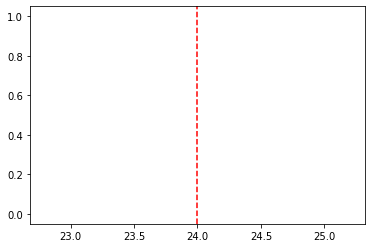

In [55]:
plt.axvline(x=24, color='r', linestyle='--')
plt.plot(-np.log10(np.abs(grad[0][0][0])))
plt.show()

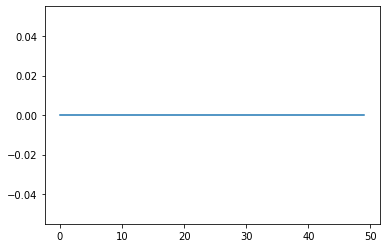

In [38]:
plt.plot(np.abs(grad[0][0][0]))
plt.show()